# 学区房价格预测

数据来自UCI机器学习知识库。本数据集仅保留无缺省值的489个数据4个参数，分别是 `RM`，`LSTAT`，`PTRATIO`，`MEDV`，含义如下：   
RM: 住宅平均房间数量  
LSTAT: 区域中低收入阶层的比率  
PTRATIO: 镇上学生与教师数量比例   
MEDV: 房屋的平均价格   

我们的最终目标是建立一个预测学区房价格的模型，但数据集中并没有标注哪些是学区房，所以我们要先将数据划分成两个簇。

In [1]:
import numpy as np
from sklearn.datasets import load_boston
housing = load_boston()
X = housing.data[:]

用K-Means算法的方法划分学区房和非学区房

In [2]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters = 2)      # 构造聚类器，2个目标类别
estimator.fit(X)                        #聚类
label_pred = estimator.labels_          # 获取聚类标签

显示聚类的结果

In [3]:
import matplotlib.pyplot as plt
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='+', label='label1')
plt.legend(loc=2)
plt.show()

<Figure size 640x480 with 1 Axes>

用高斯混合模型聚类

In [4]:
from sklearn.mixture import GaussianMixture                          # 1.选择模型类
model = GaussianMixture(n_components=2,covariance_type='full')       # 2.设置超参数，初始化模型     组件数量，协方差类型
model.fit(X)                                                         # 3.拟合数据
y_predict = model.predict(X)                                         # 4.预测簇标签
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

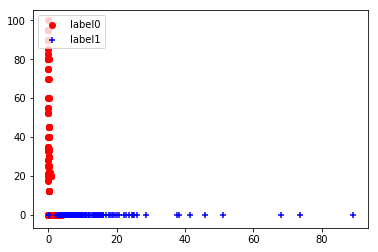

In [5]:
import matplotlib.pyplot as plt
x0 = X[y_predict == 0]
x1 = X[y_predict == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='+', label='label1')
plt.legend(loc=2)
plt.show()